In [19]:
import os
import numpy as np
import matplotlib.pyplot as plt
import astropy.io.fits as fits
from scipy.integrate import quad
from scipy import integrate as intg
import sympy as sp
from scipy import stats
from scipy.interpolate import UnivariateSpline
import pandas as pd
from scipy.stats import linregress
from scipy.stats import norm
import os
import seaborn as sns
from matplotlib import pyplot as plt, patches
import matplotlib.patches as mpatches
import statistics 
import tkinter as tk
from tkinter import messagebox
import base64
import requests

1.79
0.4586378316815741
(-0.79588, 7.2)


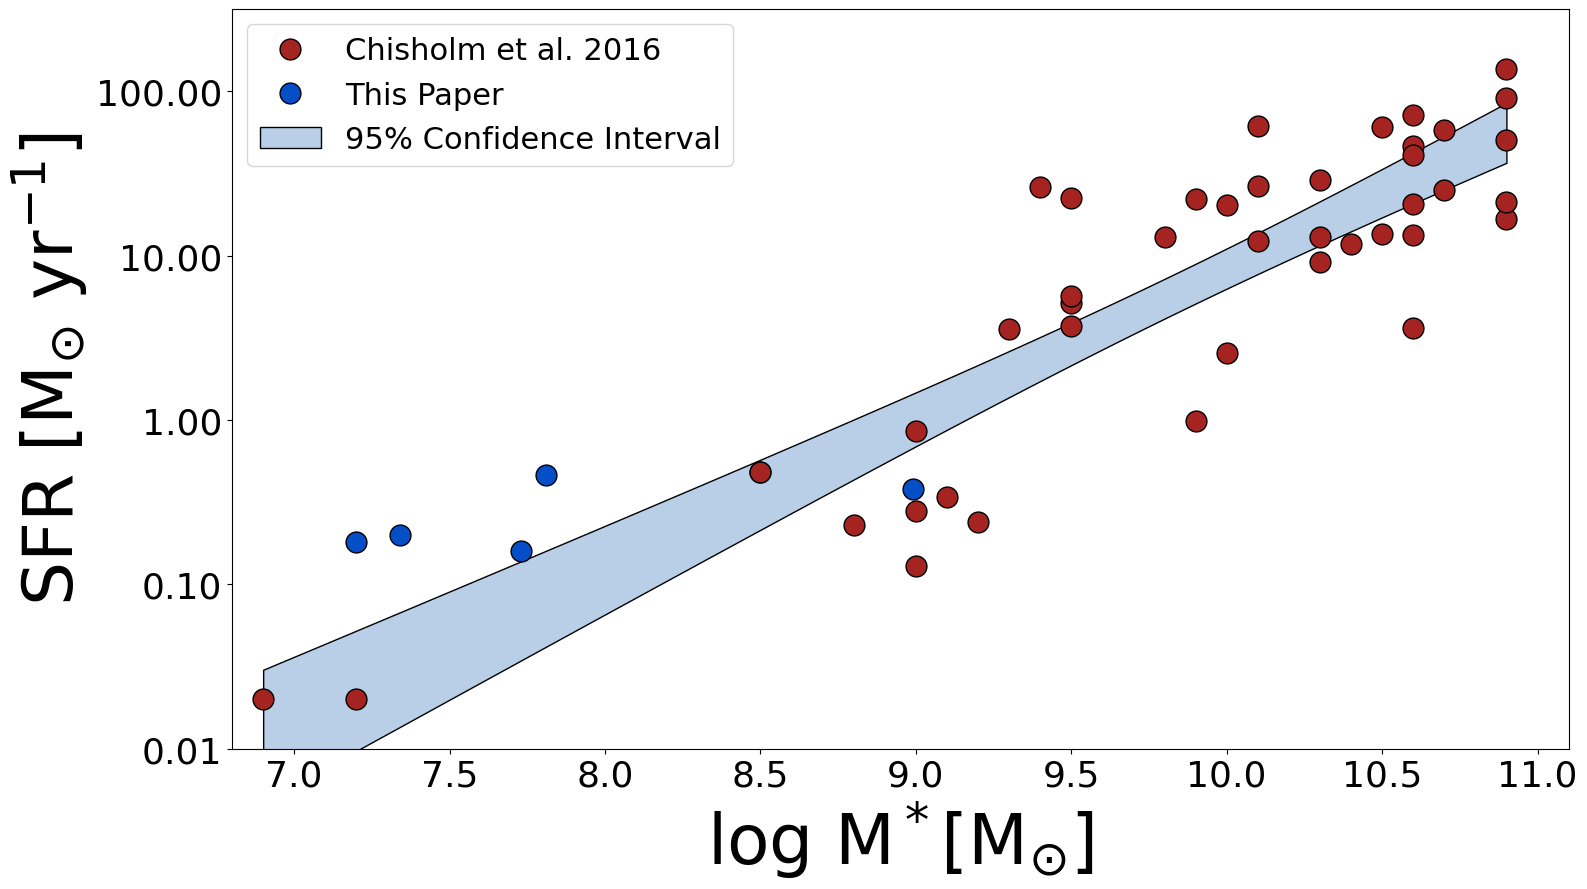

In [33]:
mydata_massarr = [7.34,7.2,7.81,8.99,7.73]
mydata_sfrTRUELIN = []
mydata_sfrarr = [-0.69897,-0.744727494896694,-0.3372421683184259,-.42,-.79588]
small_line = ([1393.76,"Si IV 1393.755",.513],
              [1334.532,"C II 1334.532",.129],[1302.168,"O I 1302.168",5.2e-2],
            [1206.51,"Si III 1206.51",1.67],[1304.37,"Si II 1304.37",.797])

johnmasstot = (10.5,10.9,10.7,10.6,10.1,10.6,10.5,9.9,10,10.9,7.2,10.6,10.9,9,9.2,9.1,8.5,8.5,6.9,9.5,9.9,9.5,8.8,10,9,10.3,10.4,10.3,10.6,10.1,10.3,10.1,10.7,9.8,9.3,10.6,9,10.9,9.5,10.6,10.9,9.4,9.5)
johnsfrtot = (13.59,50.83,25.15,13.37,26.45,71.15,60.4,22.07,20.28,136.82,0.02,3.65,90.64,0.13,0.24,0.34,0.48,0.48,0.02,3.72,0.99,5.12,0.23,2.55,0.28,9.17,11.82,28.63,46.6,12.21,12.97,61.07,58.47,13.03,3.6,20.73,0.86,16.71,5.69,41.08,21.27,26.2,22.4)
truejohnsfr = (np.log10(johnsfrtot))

replationline = '#000000'
secrelationline = '#1C7293'
myGalColor = "#044FC8"
JohnGalColor = "#A52422"
arrowcolor ='#96C9DC'
topedgecolor = '#19535F'
bottomarrowcolor = '#AFD5AA'
bottomedgecolor= '#04773B'

toplinecolor = '#19535F'
ticksz = 18

def equation(a, b):
    """Return a 1D polynomial."""
    return np.polyval(a, b) 
def plot_ci_manual(t, s_err, n, x, x2, y2, ax=None):
    """Return an axes of confidence bands using a simple approach.
    
    Notes
    -----
    .. math:: \left| \: \hat{\mu}_{y|x0} - \mu_{y|x0} \: \right| \; \leq \; T_{n-2}^{.975} \; \hat{\sigma} \; \sqrt{\frac{1}{n}+\frac{(x_0-\bar{x})^2}{\sum_{i=1}^n{(x_i-\bar{x})^2}}}
    .. math:: \hat{\sigma} = \sqrt{\sum_{i=1}^n{\frac{(y_i-\hat{y})^2}{n-2}}}
    
    References
    ----------
    .. [1] M. Duarte.  "Curve fitting," Jupyter Notebook.
       http://nbviewer.ipython.org/github/demotu/BMC/blob/master/notebooks/CurveFitting.ipynb
    
    """
    if ax is None:
        ax = plt.gca()
    
    ci = t * s_err * np.sqrt(1/n + (x2 - np.mean(x))**2 / np.sum((x - np.mean(x))**2))
    ax1.fill_between(x2, y2 + ci, y2 - ci, color="#b9cfe7", edgecolor="black",label="95% Confidence Interval")

    return ax

fig = plt.figure(figsize=(16,9))
width = np.ptp(mydata_massarr)
height = np.ptp(mydata_sfrarr)
print (width)
print (height)
print ((np.min(mydata_sfrarr), np.min(mydata_massarr)))
np.min(mydata_sfrarr)
mksize = 30

ax1=fig.add_subplot(1,1,1)

ax1.plot(johnmasstot,truejohnsfr ,  '.', markersize= mksize
         ,label = "Chisholm et al. 2016 ",color = JohnGalColor, markeredgecolor=('black'), zorder = 3)

plt.ylabel(' SFR [M$_{\odot}$ yr$^{-1}}$]', fontsize= 50)
plt.xlabel('log M$^*$[M$_{\odot}$]', fontsize= 50)


ax1.set_xlim([6.8,11.1])
ax1.set_ylim(-2,2.5)
plt.yticks(fontsize=ticksz+8)
plt.xticks(fontsize=ticksz+8)
ax1.set_yticks([-2, -1, 0,1,2])
labels = ('0.01','0.10','1.00','10.00', '100.00')
ax1.set_yticklabels(labels)

ax1.plot(mydata_massarr, mydata_sfrarr,  '.', markersize= mksize
         ,label = "This Paper ",color = myGalColor, markeredgecolor=('black'), zorder = 3)

x = johnmasstot
y = truejohnsfr
p, cov = np.polyfit(x, y, 1, cov=True)                     # parameters and covariance from of the fit of 1-D polynom.
y_model = equation(p, x)                                   # model using the fit parameters; NOTE: parameters here are coefficients

# Statistics
n = truejohnsfr.size                                           # number of observations
m = p.size                                                 # number of parameters
dof = n - m                                                # degrees of freedom
t = stats.t.ppf(0.95, n - m)                              # t-statistic; used for CI and PI bands

# Estimates of Error in Data/Model
resid = y - y_model                                        # residuals; diff. actual data from predicted values
chi2 = np.sum((resid / y_model)**2)                        # chi-squared; estimates error in data
chi2_red = chi2 / dof                                      # reduced chi-squared; measures goodness of fit
s_err = np.sqrt(np.sum(resid**2) / dof)                    # standard deviation of the error


red_patch = mpatches.Patch(color='0.1', label='The red data')
plt.legend(handles=[red_patch])



# Fit, I removed this as it is just a line that goes through the confidence interval, but it can easily be readded
#ax1.plot(x, y_model, "-", color="0.1", linewidth=1.5, alpha=0.2)  

x2 = np.linspace(np.min(x), np.max(x), 100)
y2 = equation(p, x2)

# Confidence Interval (select one)
plot_ci_manual(t, s_err, n, x, x2, y2)

leg = ax1.legend(prop={"size":22}, loc = 2)
plt.tight_layout()
plt.savefig("Fig2MassSFR",dpi=300)
plt.show()